### **TSF**(miles travelled)
Dataset Source:

https://www.kaggle.com/datasets/bulentsiyah/for-simple-exercises-time-series-forecasting

-importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set()

In [3]:
miles=pd.read_csv('/content/miles_traveled.csv')
miles.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [4]:
miles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [5]:
miles.describe().round(2)

,TRFVOLUSM227NFWA
count,588.00
mean,190420.38
std,57795.54
min,77442.00
25%,133579.00
50%,196797.50
75%,243211.50
max,288145.00


-Pre-processing Data

In [7]:
miles.set_index('DATE',inplace=True)

In [8]:
miles.index.freq = 'MS'

In [10]:
miles.rename(columns={'TRFVOLUSM227NFWA':'MILES'}, inplace=True)

-Splitting Data

In [11]:
miles.shape

(588, 1)

In [12]:
train = miles.iloc[:len(miles)-12]
train

,MILES
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0
...,...
2017-08-01,283184.0
2017-09-01,262673.0
2017-10-01,278937.0


In [13]:
test = miles.iloc[len(miles)-12:]
test

,MILES
DATE,
2018-01-01,245695.0
2018-02-01,226660.0
2018-03-01,268480.0
2018-04-01,272475.0
2018-05-01,286164.0
2018-06-01,280877.0
2018-07-01,288145.0
2018-08-01,286608.0
2018-09-01,260595.0


In [14]:
len(miles)

588

-Scaling Data

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
sc = MinMaxScaler()

In [17]:
df_train = sc.fit_transform(train)
df_train

array([[0.0130109 ],
       [0.        ],
       [0.06089061],
       [0.05961858],
       [0.09780801],
       [0.10763646],
       [0.13792216],
       [0.14067108],
       [0.08485905],
       [0.08992334],
       [0.05832273],
       [0.0594042 ],
       [0.03760821],
       [0.01274887],
       [0.07399679],
       [0.09844641],
       [0.12488268],
       [0.13335334],
       [0.16685961],
       [0.16769811],
       [0.11361547],
       [0.11949919],
       [0.08629306],
       [0.0861025 ],
       [0.07157184],
       [0.05159575],
       [0.12140962],
       [0.12289603],
       [0.15961334],
       [0.17066617],
       [0.19605433],
       [0.20233825],
       [0.14592594],
       [0.14958957],
       [0.11123816],
       [0.11242443],
       [0.09157651],
       [0.07205778],
       [0.1431532 ],
       [0.14615462],
       [0.17806966],
       [0.18302438],
       [0.21078032],
       [0.22383886],
       [0.15669292],
       [0.16982768],
       [0.12834146],
       [0.102

In [18]:
df_test = sc.fit_transform(test)
df_test

array([[0.3095877 ],
       [0.        ],
       [0.68016589],
       [0.74514109],
       [0.96778076],
       [0.88179231],
       [1.        ],
       [0.97500203],
       [0.55192323],
       [0.90288688],
       [0.51931365],
       [0.6790762 ]])

-Time-series Generator

In [19]:
n_input = 12
n_features = 1

In [20]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
generator = TimeseriesGenerator(df_train, df_train, length=n_input, batch_size=1)

In [22]:
len(generator)

564

In [23]:
len(df_train)

576

In [24]:
df_train[:13]

array([[0.0130109 ],
       [0.        ],
       [0.06089061],
       [0.05961858],
       [0.09780801],
       [0.10763646],
       [0.13792216],
       [0.14067108],
       [0.08485905],
       [0.08992334],
       [0.05832273],
       [0.0594042 ],
       [0.03760821]])

In [25]:
generator[0]

(array([[[0.0130109 ],
         [0.        ],
         [0.06089061],
         [0.05961858],
         [0.09780801],
         [0.10763646],
         [0.13792216],
         [0.14067108],
         [0.08485905],
         [0.08992334],
         [0.05832273],
         [0.0594042 ]]]),
 array([[0.03760821]]))

In [26]:
generator[0][0].shape

(1, 12, 1)

-Model Training & Building

In [27]:
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [28]:
model = Sequential(
    [(LSTM(50, activation='relu', input_shape=(n_input, n_features))),
     (Dense(1))])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(optimizer='adam', loss='mse')

In [31]:
model.fit_generator(generator,epochs=30)

Epoch 1/30


<ipython-input-31-f16eb7467fcd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=30)


564/564 [==============================] - 6s 7ms/step - loss: 0.0143
Epoch 2/30
564/564 [==============================] - 4s 7ms/step - loss: 0.0065
Epoch 3/30
564/564 [==============================] - 5s 8ms/step - loss: 0.0051
Epoch 4/30
564/564 [==============================] - 4s 6ms/step - loss: 0.0048
Epoch 5/30
564/564 [==============================] - 4s 7ms/step - loss: 0.0050
Epoch 6/30
564/564 [==============================] - 5s 9ms/step - loss: 0.0043
Epoch 7/30
564/564 [==============================] - 4s 7ms/step - loss: 0.0039
Epoch 8/30
564/564 [==============================] - 4s 6ms/step - loss: 0.0031
Epoch 9/30
564/564 [==============================] - 5s 9ms/step - loss: 0.0029
Epoch 10/30
564/564 [==============================] - 4s 7ms/step - loss: 0.0025
Epoch 11/30
564/564 [==============================] - 4s 7ms/step - loss: 0.0019
Epoch 12/30
564/564 [==============================] - 4s 8ms/step - loss: 0.0017
Epoch 13/30
564/564 [===============

-Model Evaluation

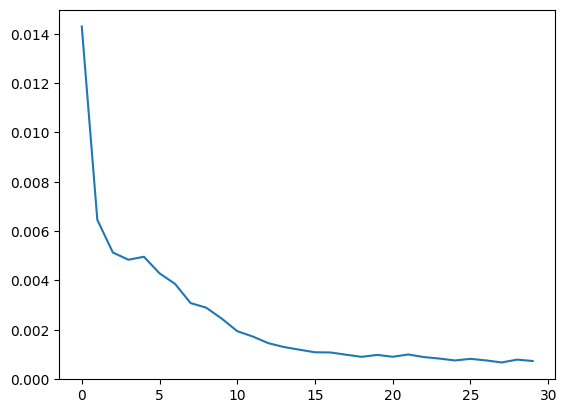

In [32]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [33]:
df_train[-n_input:]

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

In [34]:
first_eval_batch = df_train[-n_input:]

In [36]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [37]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 406ms/step


array([[0.80408835]], dtype=float32)

-Model Deployment

In [42]:
model.save('miles_model.h5')

In [43]:
from keras.models import load_model

In [45]:
loaded = load_model('miles_model.h5')

In [46]:
loaded.predict(first_eval_batch)

1/1 [==============================] - 0s 222ms/step


array([[0.80408835]], dtype=float32)